In [1]:
import pandas as pd
from scipy.stats import hmean

# Load the Excel file into a DataFrame
file_path = "/Users/marclambertes/Downloads/Database Men 2023-2024/Segunda Liga - 2023-2024.xlsx"
df = pd.read_excel(file_path)

# Drop rows with NaN values in the specified columns
df.dropna(subset=['Passes to final third per 90', 'Passes to penalty area per 90', 
                  'Key passes per 90', 'Progressive passes per 90', 'Through passes per 90'], inplace=True)

# Filter out rows where any of the metrics are zero
df = df[(df['Passes to final third per 90'] != 0) & 
        (df['Passes to penalty area per 90'] != 0) & 
        (df['Key passes per 90'] != 0) & 
        (df['Through passes per 90'] != 0) & 
        (df['Progressive passes per 90'] != 0)]

# Calculate harmonic mean for each player
df['Harmonic Mean'] = hmean(df[['Passes to final third per 90', 'Passes to penalty area per 90', 
                  'Key passes per 90', 'Progressive passes per 90', 'Through passes per 90']], axis=1)

# Print player names along with their specific harmonic mean
for index, row in df.iterrows():
    print(f"Player: {row['Player']}, Harmonic Mean: {row['Harmonic Mean']}")
    
df.to_excel("/Users/marclambertes/Downloads/PPS Eredivisie.xlsx", index=False)



Player: F. Rønnow, Harmonic Mean: 0.11670278582324888
Player: M. Riemann, Harmonic Mean: 0.13893154970343247
Player: W. Pacho, Harmonic Mean: 0.3330584138196102
Player: P. Mainka, Harmonic Mean: 0.09263181185468702
Player: Bernardo, Harmonic Mean: 0.1403346116566227
Player: F. Uduokhai, Harmonic Mean: 0.23312932975085437
Player: W. Anton, Harmonic Mean: 0.2580557103005303
Player: M. Eggestein, Harmonic Mean: 0.45267445529441996
Player: E. Demirović, Harmonic Mean: 0.608737514779156
Player: G. Xhaka, Harmonic Mean: 1.0361889730983675
Player: T. Kleindienst, Harmonic Mean: 0.29217268266249213
Player: A. Stiller, Harmonic Mean: 1.1292905885543012
Player: H. Kane, Harmonic Mean: 1.3503483523700581
Player: N. Schlotterbeck, Harmonic Mean: 0.6584049744543917
Player: J. Weigl, Harmonic Mean: 0.2997478033075091
Player: K. Vogt, Harmonic Mean: 0.13240438498286705
Player: Alex Grimaldo, Harmonic Mean: 1.7943907990726224
Player: Diogo Leite, Harmonic Mean: 0.30033963743491615
Player: D. Raum, Har

In [1]:
import pandas as pd
import numpy as np

# Load the Excel file into a DataFrame
file_path = "/Users/marclambertes/Downloads/Database Men 2023-2024/Segunda Liga - 2023-2024.xlsx"
df = pd.read_excel(file_path)

# Filter players who have played 900 minutes or less and whose position includes 'MF'
#df = df[df['Minutes played'] <= 900]
#df = df[df['Position'].str.contains('CF', na=False)]

# Drop rows with NaN values in the specified columns
df.dropna(subset=['Passes to final third per 90', 'Passes to penalty area per 90', 
                  'Key passes per 90', 'Progressive passes per 90', 'Through passes per 90'], inplace=True)

# Filter out rows where any of the metrics are zero
df = df[(df['Passes to final third per 90'] != 0) & 
        (df['Passes to penalty area per 90'] != 0) & 
        (df['Key passes per 90'] != 0) & 
        (df['Through passes per 90'] != 0) & 
        (df['Progressive passes per 90'] != 0)]

# Weights for each metric
weights = {
    'Passes to final third per 90': 1,
    'Passes to penalty area per 90': 2,
    'Key passes per 90': 1,
    'Through passes per 90': 1,
    'Progressive passes per 90': 3
}

# Calculate weighted harmonic mean
def weighted_hmean(row, weights):
    numerator = sum(weights.values())
    denominator = sum(weights[col] / row[col] for col in weights)
    return numerator / denominator

df['Weighted Harmonic Mean'] = df.apply(weighted_hmean, axis=1, weights=weights)

# Normalize the weighted harmonic mean to a 0-100 scale
min_hmean = df['Weighted Harmonic Mean'].min()
max_hmean = df['Weighted Harmonic Mean'].max()

df['Normalized Harmonic Mean'] = 100 * (df['Weighted Harmonic Mean'] - min_hmean) / (max_hmean - min_hmean)
df['Normalized Harmonic Mean'] = df['Normalized Harmonic Mean'].round(2)

# Print player names along with their specific normalized harmonic mean
for index, row in df.iterrows():
    print(f"Player: {row['Player']}, Normalized Harmonic Mean: {row['Normalized Harmonic Mean']}")

# Save the updated DataFrame to a new Excel file
output_file_path = "/Users/marclambertes/Downloads/PPS Eredivisie.xlsx"
df.to_excel(output_file_path, index=False)


Player: João Miguel, Normalized Harmonic Mean: 5.04
Player: Léo Bolgado, Normalized Harmonic Mean: 6.45
Player: João Afonso, Normalized Harmonic Mean: 1.18
Player: O. Diao, Normalized Harmonic Mean: 22.23
Player: João Aurélio, Normalized Harmonic Mean: 53.7
Player: João Batista, Normalized Harmonic Mean: 10.17
Player: Ricardo Alves, Normalized Harmonic Mean: 21.49
Player: André Almeida, Normalized Harmonic Mean: 1.76
Player: A. Correia, Normalized Harmonic Mean: 9.44
Player: Sérgio Conceição, Normalized Harmonic Mean: 54.95
Player: Andre Clóvis, Normalized Harmonic Mean: 11.57
Player: Pedro Pacheco, Normalized Harmonic Mean: 13.89
Player: V. Danilović, Normalized Harmonic Mean: 27.28
Player: Paulo Vitor, Normalized Harmonic Mean: 2.04
Player: C. Akas, Normalized Harmonic Mean: 1.78
Player: J. Ramírez, Normalized Harmonic Mean: 6.34
Player: Luís Rocha, Normalized Harmonic Mean: 0.0
Player: G. Marques, Normalized Harmonic Mean: 1.85
Player: Luís Esteves, Normalized Harmonic Mean: 46.83
P

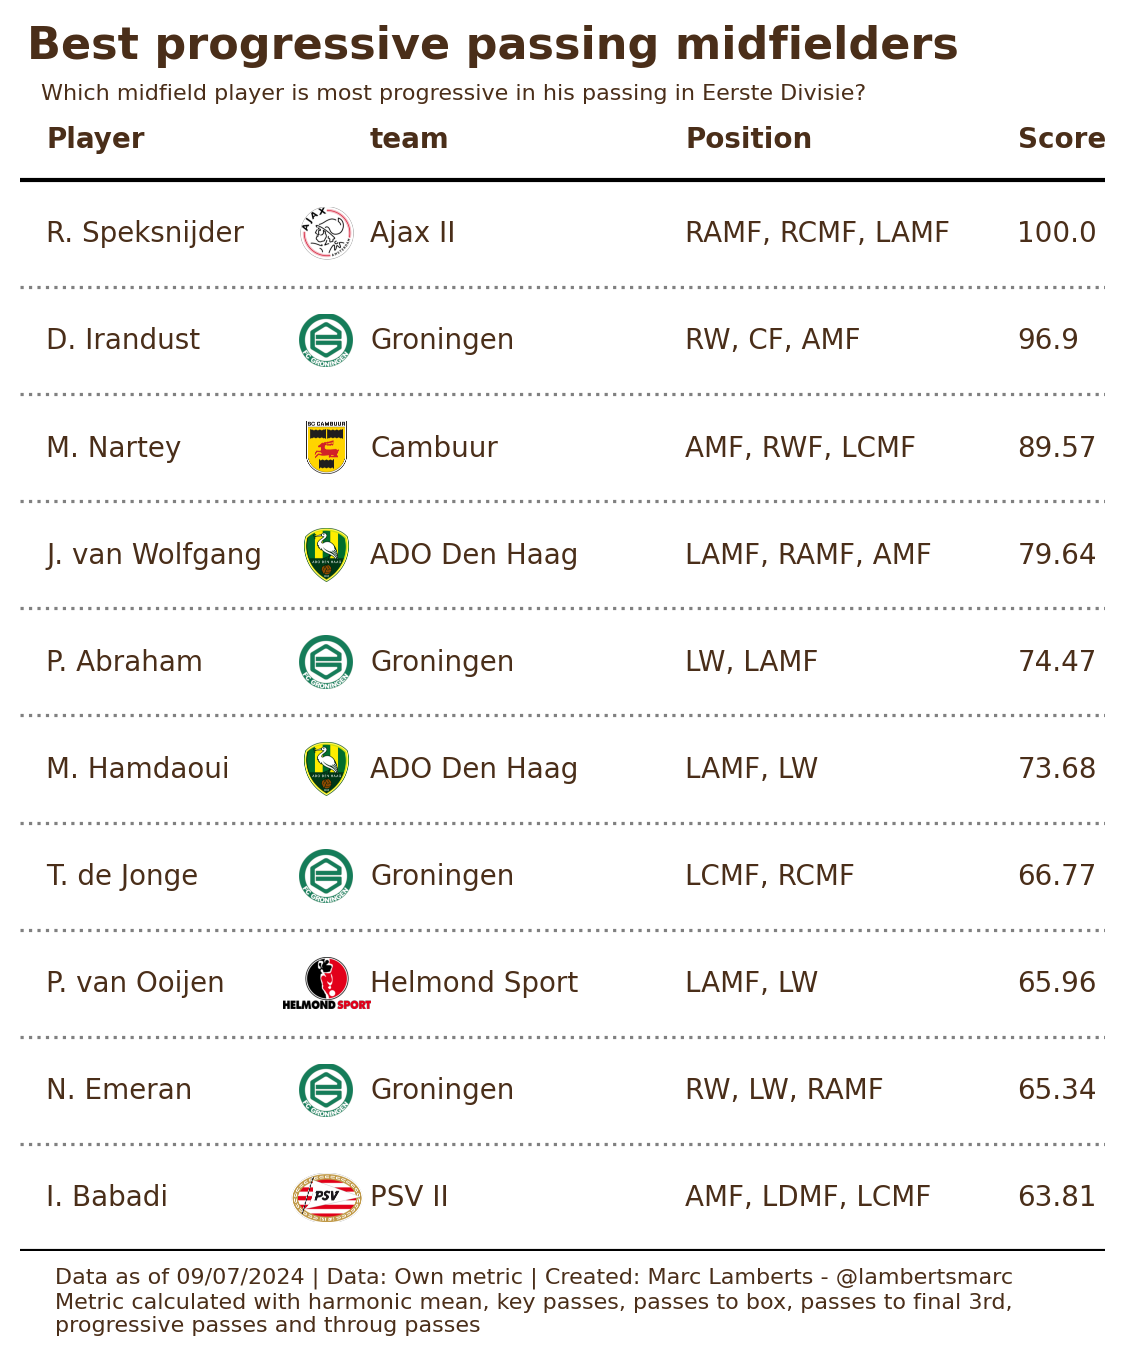

In [23]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter


df = pd.read_excel('/Users/marclambertes/Downloads/PPS Eredivisie.xlsx')
df = df.rename(columns={'Normalized Harmonic Mean': 'Score'})
df = df.rename(columns={'Team within selected timeframe': 'team'})
df['Score'] = (df['Score']).round(2)
df = df.rename(columns={'playerName': 'Player'})
df = df.sort_values(by='Score', ascending=False).head(10)


def ax_logo(team, ax,):
    path = r'/Users/marclambertes/Downloads/Images'
    club_icon = Image.open('%s/%s.png' %(path,team))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

indexdf = df.head(10)[['Player', 'team', 'Position', 'Score']].reset_index(drop=True)
indexdf_short=indexdf[::-1]


fig = plt.figure(figsize=(7,8), dpi=200)
ax = plt.subplot()

ncols = len(indexdf_short.columns.tolist())+1
nrows = indexdf_short.shape[0]

ax.set_xlim(0, ncols + 1.2)
ax.set_ylim(0, nrows + 1.5)

# lgs = ['J1', 'J2', 'Ekstraklasa', 'J3']
# if lg in lgs:
positions = [0.15, 2.0, 3.8, 5.7]
# else:
#     positions = [0.25, 2.25, 3.75, 4.5, 5.25]
columns = indexdf_short.columns.tolist()

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if 'xG per 90' in column:
            text_label = f'{indexdf_short[column].iloc[i]:,.2f}'
            weight = 'regular'
        else:
            text_label = f'{indexdf_short[column].iloc[i]}'
            weight = 'regular'
        ax.annotate(
            xy=(positions[j], i + .5),
            text = text_label,
            ha='left',
            va='center', color='#4A2E19',
            weight=weight
        )

# Add column names
column_names = columns
for index, c in enumerate(column_names):
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha='left',
            va='bottom',
            weight='bold', color='#4A2E19'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([1.5, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(indexdf_short['team'].iloc[x], flag_ax,)

fig.text(
    x=0.13, y=.85,
    s='Best progressive passing midfielders',
    ha='left',
    va='bottom',
    weight='bold',
    size=16, color='#4A2E19'
)
fig.text(
    x=0.15, y=0.10,
    s='Data as of 09/07/2024 | Data: Own metric | Created: Marc Lamberts - @lambertsmarc\nMetric calculated with harmonic mean, key passes, passes to box, passes to final 3rd,\nprogressive passes and throug passes',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)

fig.text(
    x=0.14, y=0.84,
    s='Which midfield player is most progressive in his passing in Eerste Divisie?',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)

plt.savefig('PDS - eer.png',dpi=750,bbox_inches = 'tight', facecolor='white')
#plt.savefig('Similar Players - Momiki.pdf', dpi=750, bbox_inches='tight', facecolor='white')